<a href="https://colab.research.google.com/github/chintanrout/Statistics-Projects/blob/main/House_price_predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
pip install bioinfokit

     |████████████████████████████████| 82 kB 798 kB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.4-py3-none-any.whl size=56009 sha256=0c28aebaeb1c05674588b6db6b7eaab308c9578bec88f38fcf5c17d3ee13e3b7
  Stored in directory: /root/.cache/pip/wheels/5d/f0/f9/3cfa74f39676f6745eeb99be64826173241a47808d2cb2f30f
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7095 sha256=86f82045218d498e84244f1be02c1b676bb351bd1929febbb7fc66de700d727c
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [3]:
from bioinfokit.analys import stat

In [4]:
df = pd.read_csv('HousePrice.csv')

In [5]:
df.head()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,6.0622,3,222,18.7,5.33,36.2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     490 non-null    float64
 1   zn       490 non-null    float64
 2   indus    490 non-null    float64
 3   chas     490 non-null    int64  
 4   nox      490 non-null    float64
 5   rm       490 non-null    float64
 6   dis      490 non-null    float64
 7   rad      490 non-null    int64  
 8   tax      490 non-null    int64  
 9   ptratio  490 non-null    float64
 10  lstat    490 non-null    float64
 11  medv     490 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 46.1 KB


In [8]:
df.shape

(490, 12)

In [9]:
#Hence no missing values

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,490.0,3.643241,8.722154,0.00632,0.082045,0.24751,3.647422,88.9762
zn,490.0,11.112245,22.844626,0.00000,0.000000,0.00000,12.500000,100.0000
indus,490.0,11.113143,6.821302,0.74000,5.190000,9.69000,18.100000,27.7400
chas,490.0,0.059184,0.236209,0.00000,0.000000,0.00000,0.000000,1.0000
nox,490.0,0.554307,0.116688,0.38500,0.449000,0.53800,0.624000,0.8710
rm,490.0,6.245471,0.653147,3.56100,5.881000,6.18500,6.578000,8.7800
dis,490.0,3.834519,2.109948,1.13700,2.111050,3.27590,5.214600,12.1265
rad,490.0,9.514286,8.691297,1.00000,4.000000,5.00000,24.000000,24.0000
tax,490.0,408.002041,168.065190,187.00000,280.250000,330.00000,666.000000,711.0000
ptratio,490.0,18.520000,2.110478,12.60000,17.400000,19.10000,20.200000,22.0000


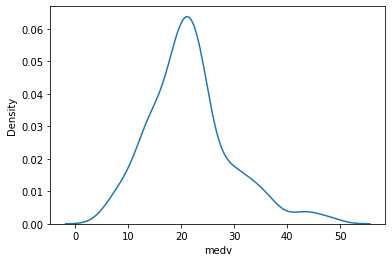

In [11]:
sns.kdeplot(df.medv)

In [13]:
columns = df.columns

In [16]:
df.shape

(490, 12)

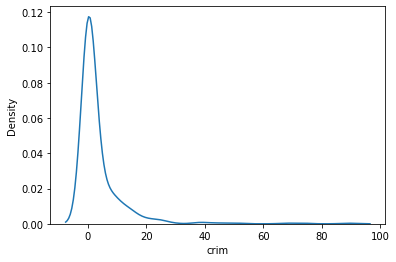

In [12]:
sns.kdeplot(df.crim)

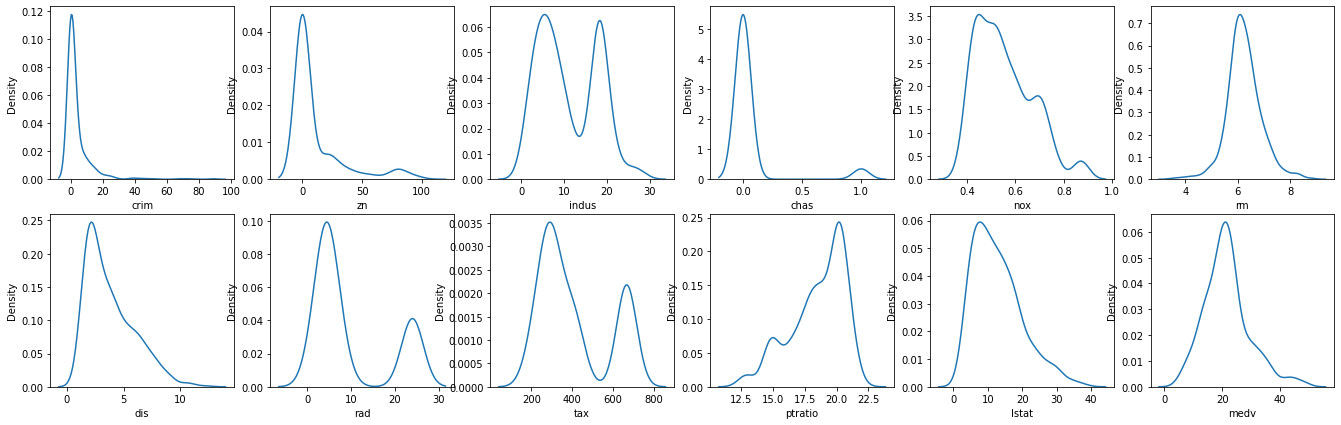

In [23]:
plt.figure(figsize =(23,7))
count = 1
for i in columns:
  plt.subplot(2,6,count)
  sns.kdeplot(df.loc[:,i])
  count = count+1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

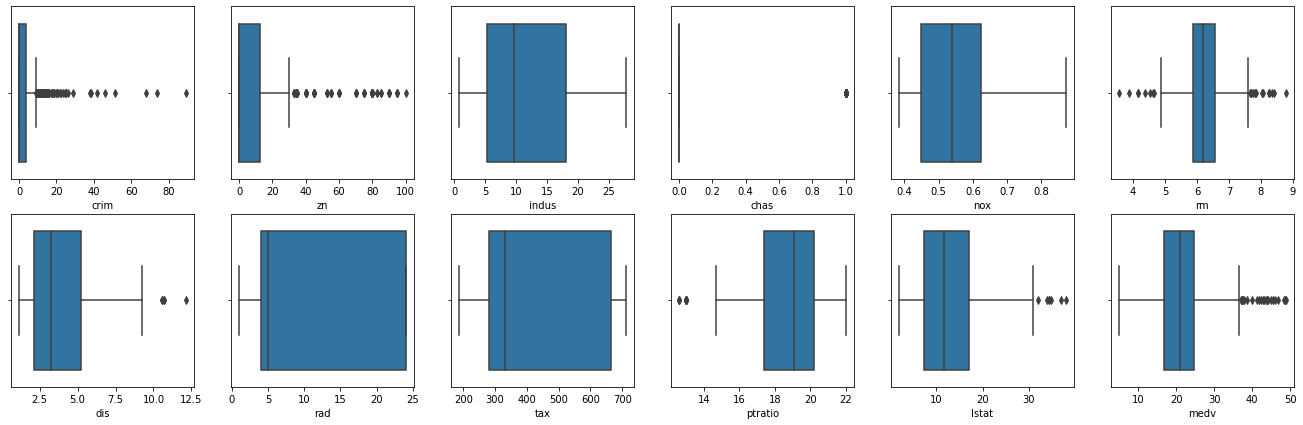

In [24]:
plt.figure(figsize =(23,7))
count = 1
for i in columns:
  plt.subplot(2,6,count)
  sns.boxplot(df.loc[:,i])
  count = count+1

In [26]:
df.corr()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,lstat,medv
crim,1.000000,-0.199075,0.408053,-0.064210,0.420476,-0.219307,-0.382231,0.627434,0.583711,0.287079,0.461755,-0.450115
zn,-0.199075,1.000000,-0.527121,-0.053911,-0.512137,0.310506,0.673227,-0.307726,-0.302897,-0.381815,-0.422090,0.404608
indus,0.408053,-0.527121,1.000000,0.035815,0.765155,-0.412413,-0.710284,0.596124,0.717678,0.387656,0.636527,-0.600005
chas,-0.064210,-0.053911,0.035815,1.000000,0.085619,0.044979,-0.077705,-0.032786,-0.067743,-0.116830,-0.006486,0.074803
nox,0.420476,-0.512137,0.765155,0.085619,1.000000,-0.322609,-0.768122,0.612160,0.667380,0.188381,0.612444,-0.524451
rm,-0.219307,0.310506,-0.412413,0.044979,-0.322609,1.000000,0.245789,-0.195768,-0.281955,-0.293299,-0.610369,0.686634
dis,-0.382231,0.673227,-0.710284,-0.077705,-0.768122,0.245789,1.000000,-0.491875,-0.532025,-0.246773,-0.536493,0.368813
rad,0.627434,-0.307726,0.596124,-0.032786,0.612160,-0.195768,-0.491875,1.000000,0.909000,0.456035,0.510192,-0.476296
tax,0.583711,-0.302897,0.717678,-0.067743,0.667380,-0.281955,-0.532025,0.909000,1.000000,0.452252,0.566467,-0.572442
ptratio,0.287079,-0.381815,0.387656,-0.116830,0.188381,-0.293299,-0.246773,0.456035,0.452252,1.000000,0.358023,-0.518641


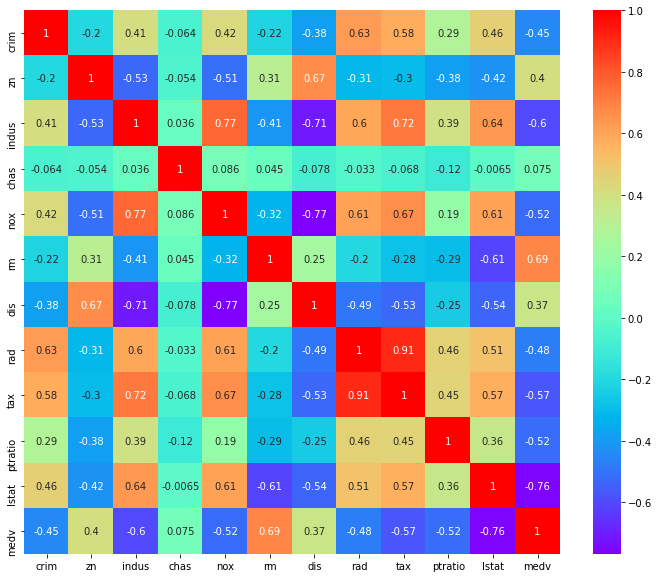

In [32]:
plt.figure(figsize =(12,10))
sns.heatmap(df.corr(), annot = True,cmap = 'rainbow')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


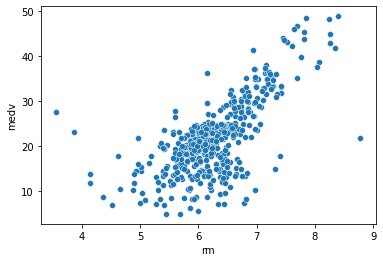

In [33]:
sns.scatterplot(df.rm,df.medv)

In [34]:
df['crimnew'] = np.log(df.crim)

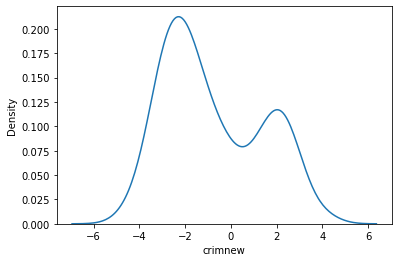

In [35]:
sns.kdeplot(df.crimnew)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


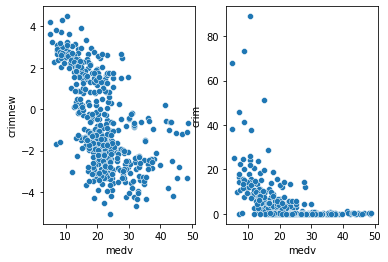

In [38]:
plt.subplot(1,2,1)
sns.scatterplot(df.medv,df.crimnew)
plt.subplot(1,2,2)
sns.scatterplot(df.medv,df.crim)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


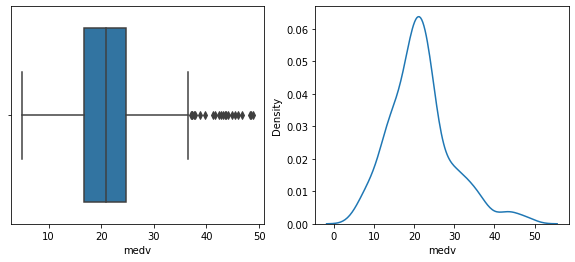

In [62]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df.medv)

plt.subplot(1,2,2)
sns.kdeplot(df.medv)

In [72]:
df= df.drop('logzn', axis = 1)

In [75]:
X = df.drop('medv', axis = 1)
y = df.medv
X2 = sm.add_constant(X)
lm1 = sm.OLS(y,X2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          1.62e-144
Time:                        04:55:20   Log-Likelihood:                -1345.9
No. Observations:                 490   AIC:                             2716.
Df Residuals:                     478   BIC:                             2766.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.2868      3.999      9.325      0.0

In [76]:
#'crim', 'zn', 'indus', 'chas', 'nox', 'rm','dis', 'rad', 'tax', 'ptratio', 'lstat',
formula = 'medv ~ crim + zn + nox + rm + dis + rad + tax + ptratio + lstat'
lm2 = smf.ols(formula = formula, data = df).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          1.75e-146
Time:                        04:57:02   Log-Likelihood:                -1346.6
No. Observations:                 490   AIC:                             2713.
Df Residuals:                     480   BIC:                             2755.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.6032      3.986      9.434      0.0

In [77]:
pred = lm2.predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


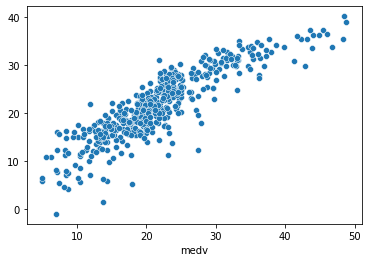

In [78]:
sns.scatterplot(df.medv, pred)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


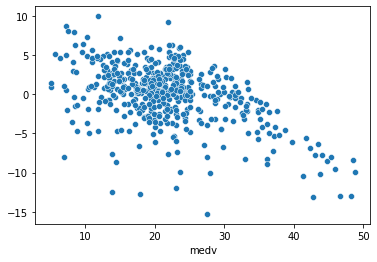

In [80]:
sns.scatterplot(df.medv, pred - df.medv)

**Scaled Model**

In [81]:
def scale(data):
    dataout = (data - data.min())/(data.max()-data.min())
    return dataout

In [82]:
for i in df.columns:
    df[i] = scale(df[i])

In [83]:
df.describe()

,crim,zn,indus,chas,nox,rm,dis,rad,tax,ptratio,lstat,medv
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,0.040878,0.111122,0.384190,0.059184,0.348369,0.514365,0.245463,0.370186,0.421760,0.629787,0.304085,0.379815
std,0.098035,0.228446,0.252641,0.236209,0.240098,0.125148,0.191997,0.377882,0.320735,0.224519,0.196810,0.179573
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000851,0.000000,0.164815,0.000000,0.131687,0.444530,0.088635,0.130435,0.177958,0.510638,0.149139,0.267123
50%,0.002711,0.000000,0.331481,0.000000,0.314815,0.502778,0.194631,0.173913,0.272901,0.691489,0.269380,0.363014
75%,0.040925,0.125000,0.642963,0.000000,0.491770,0.578080,0.371045,1.000000,0.914122,0.808511,0.420603,0.449201
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
formula = 'medv ~ crim + zn + nox + rm + dis + rad + tax + ptratio + lstat'
lm3 = smf.ols(formula = formula, data = df).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     177.3
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          1.75e-146
Time:                        05:02:07   Log-Likelihood:                 505.42
No. Observations:                 490   AIC:                            -990.8
Df Residuals:                     480   BIC:                            -948.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5380      0.037     14.619      0.0

In [85]:
lm3.params.abs().sort_values(ascending = False)

Intercept    0.538025
rm           0.419029
lstat        0.334317
dis          0.276054
crim         0.239221
tax          0.186540
ptratio      0.185143
nox          0.172322
rad          0.137338
zn           0.089308
dtype: float64

In [86]:
lm3.params.sort_values(ascending = False)

Intercept    0.538025
rm           0.419029
rad          0.137338
zn           0.089308
nox         -0.172322
ptratio     -0.185143
tax         -0.186540
crim        -0.239221
dis         -0.276054
lstat       -0.334317
dtype: float64

In [87]:
#No. of rooms has the maximum influence and the zoning properties have the lowest influence